In [4]:
import math, sys
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pp
from PIL import Image
import scipy.fft as fft
import zlib

rand = np.random.rand

https://en.wikipedia.org/wiki/Modified_discrete_cosine_transform

In [5]:
N = 8
A = np.zeros(N, float)
B = rand(N)
np.round(B, 3)

array([0.632, 0.138, 0.863, 0.587, 0.284, 0.502, 0.856, 0.672])

In [6]:
def mdct(A, B):
    n = len(A)//2
    x = np.zeros(2*n, float)
    for i in range(0, n):
        x[n - i - 1] = -B[i] - B[2*n - i - 1]
        x[n + i + 0] = +A[i] - A[2*n - i - 1]
    return fft.dct(x, 4)

def imdct(z):
    n = len(z)//2
    x = fft.dct(z, 4)
    A = np.zeros(2*n, float)
    B = np.zeros(2*n, float)
    for i in range(0, n):
        A[0*n + i] = +x[1*n + i + 0]/(8*n)
        A[1*n + i] = -x[2*n - i - 1]/(8*n)
        B[0*n + i] = -x[1*n - i - 1]/(8*n)
        B[1*n + i] = -x[0*n + i + 0]/(8*n)
    return A, B

In [7]:
np.round(imdct(mdct(A, B))[1] + imdct(mdct(B, A))[0], 3), np.round(B, 3)

(array([0.632, 0.138, 0.863, 0.587, 0.284, 0.502, 0.856, 0.672]),
 array([0.632, 0.138, 0.863, 0.587, 0.284, 0.502, 0.856, 0.672]))

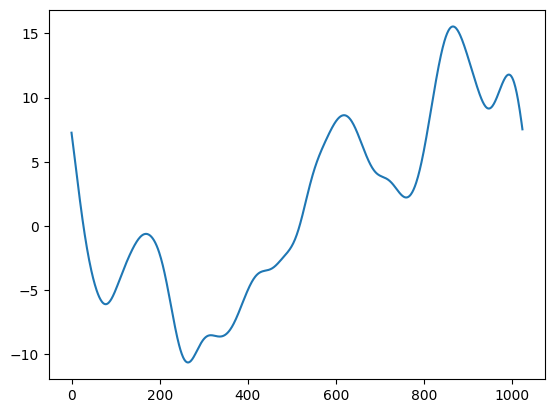

In [8]:
N = 1024
I = complex(0, 1)
z = np.sqrt(rand(N//2 + 1))*np.exp(I*rand(N//2 + 1)*math.pi)
z *= 1.4**-np.arange(0, N//2 + 1)
x = 7000*fft.irfft(z)
pp.plot(x)

array([0.1       , 0.09801987, 0.09607894, 0.09417645, 0.09231163,
       0.09048374, 0.08869204, 0.08693582, 0.08521438, 0.08352702,
       0.08187308, 0.08025188, 0.07866279, 0.07710516, 0.07557837,
       0.07408182, 0.0726149 , 0.07117703, 0.06976763, 0.06838614,
       0.067032  , 0.06570468, 0.06440364, 0.06312836, 0.06187834,
       0.06065307, 0.05945205, 0.05827483, 0.05712091, 0.05598984,
       0.05488116, 0.05379444, 0.05272924, 0.05168513, 0.0506617 ,
       0.04965853, 0.04867523, 0.04771139, 0.04676664, 0.0458406 ,
       0.0449329 , 0.04404317, 0.04317105, 0.04231621, 0.04147829,
       0.04065697, 0.0398519 , 0.03906278, 0.03828929, 0.03753111,
       0.03678794, 0.03605949, 0.03534547, 0.03464558, 0.03395955,
       0.03328711, 0.03262798, 0.0319819 , 0.03134862, 0.03072787,
       0.03011942, 0.02952302, 0.02893842, 0.0283654 ])

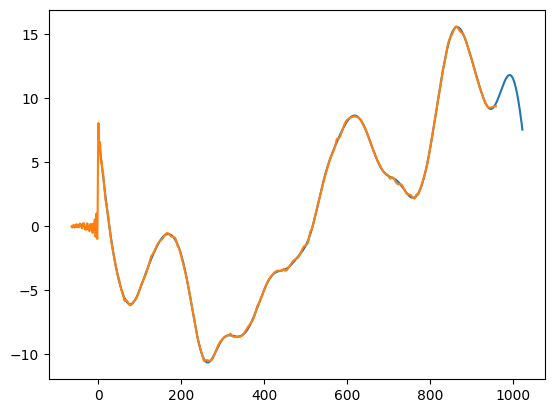

In [11]:
BLOCK_SIZE = 64
cursor = 0
out = np.zeros(N, float)
dct = np.zeros(BLOCK_SIZE, float)
prev_in = np.zeros(BLOCK_SIZE, float)
prev_out = np.zeros(BLOCK_SIZE, float)

window = np.arange(0, 2*BLOCK_SIZE) + 0.5
# sin() window:
window = math.sqrt(2)*np.sin(window*(math.pi/(2*BLOCK_SIZE)))
# Vorbis window:
# window = np.sin(window*(math.pi/(2*BLOCK_SIZE)))**2
# window = math.sqrt(2)*np.sin(math.pi/2*window)
w0 = window[:BLOCK_SIZE]
w1 = window[BLOCK_SIZE:]
# w0, w1 = 1, 1

q = 0.1*np.exp(-0.02*np.arange(0, BLOCK_SIZE))

while cursor < len(x):
    block_in = x[cursor:cursor + BLOCK_SIZE]
    z = mdct(prev_in*w0, block_in*w1)
    # z = fft.dct(block_in)
    z = np.round(z*q)
    dct = np.maximum(dct, abs(z))
    prev_in = block_in
    
    z /= q
    a, b = imdct(z)
    a *= w0; b *= w1
    block, prev_out = prev_out + a, b
    # block = fft.idct(z)
    
    out[cursor:cursor + BLOCK_SIZE] = block
    cursor += BLOCK_SIZE

pp.plot(x)
pp.plot(np.arange(N) - 1*BLOCK_SIZE, out)
q

In [ ]:
pp.ylim((0, 10))
pp.plot(np.log2(dct))